In [1]:
# PCA EXERCISE DIMENSIONS REDUCTION TECHNIQUE

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.shape

(918, 12)

In [8]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [9]:
df[(df.RestingECG == 'Normal') & (df.HeartDisease == 0)].shape

(267, 12)

<Axes: xlabel='RestingECG'>

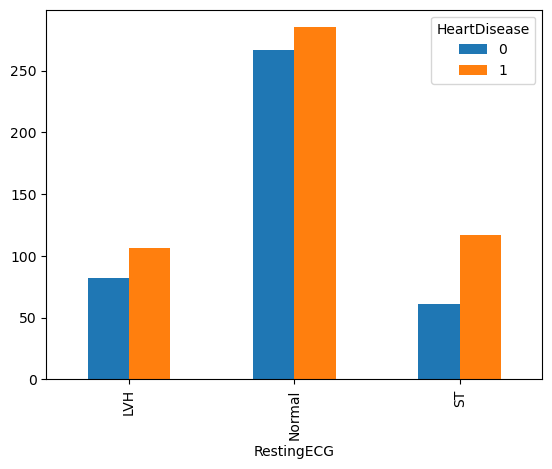

In [10]:
pd.crosstab(df.RestingECG, df.HeartDisease).plot(kind='bar')

In [11]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<Axes: xlabel='ChestPainType'>

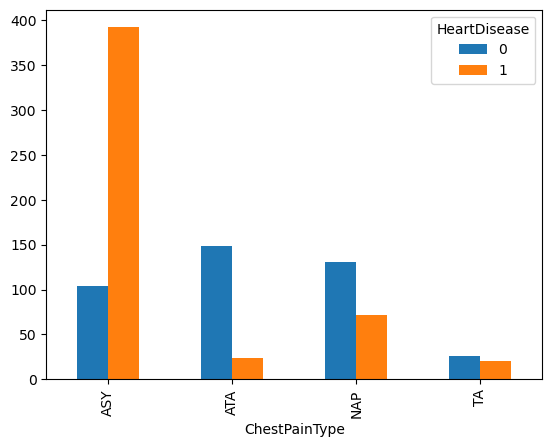

In [12]:
pd.crosstab(df.ChestPainType, df.HeartDisease).plot(kind='bar')

<Axes: xlabel='Sex'>

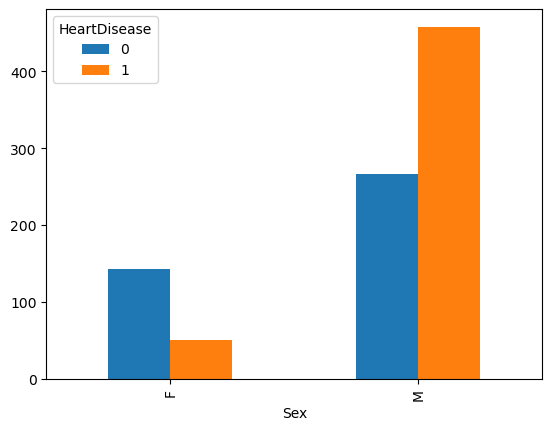

In [13]:
pd.crosstab(df.Sex, df.HeartDisease).plot(kind='bar')

In [14]:
df.FastingBS.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='FastingBS'>

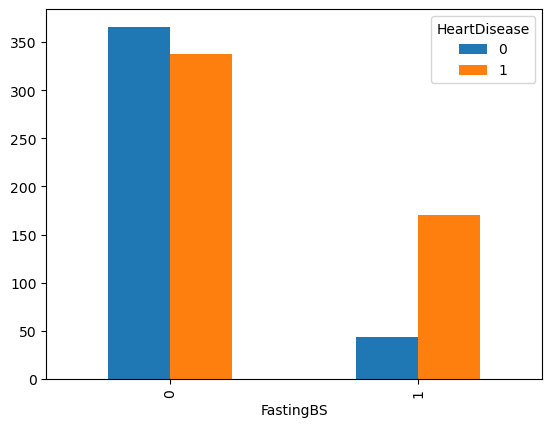

In [15]:
pd.crosstab(df.FastingBS, df.HeartDisease).plot(kind='bar')

<Axes: xlabel='ST_Slope'>

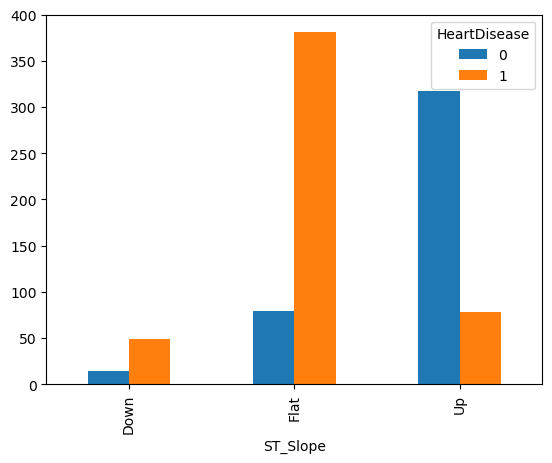

In [16]:
pd.crosstab(df.ST_Slope, df.HeartDisease).plot(kind='bar')

In [17]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

<Axes: xlabel='ExerciseAngina'>

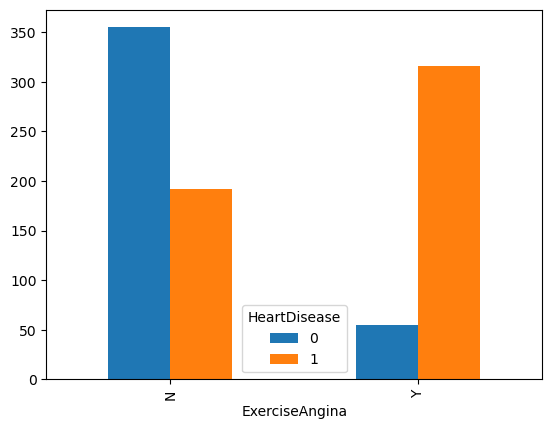

In [18]:
pd.crosstab(df.ExerciseAngina, df.HeartDisease).plot(kind='bar')

In [19]:
df.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [20]:
df.groupby('HeartDisease')['RestingBP'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,130.180488,16.499585,80.0,120.0,130.0,140.0,190.0
1,508.0,134.185039,19.828685,0.0,120.0,132.0,145.0,200.0


In [21]:
df.groupby('HeartDisease')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,50.551220,9.444915,28.0,43.0,51.0,57.0,76.0
1,508.0,55.899606,8.727056,31.0,51.0,57.0,62.0,77.0


In [22]:
df = df[~(df.RestingBP == 0)]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df[df.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [24]:
upper_BP = df.RestingBP.mean() + 3*df.RestingBP.std()
upper_BP

186.54014061847656

In [25]:
df = df[(df.RestingBP < upper_BP)]
print(df.shape)
df.head()

(910, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
upper_cholesterol = df.Cholesterol.mean() + 3*df.Cholesterol.std()
upper_cholesterol

526.5563408865839

In [27]:
df = df[(df.Cholesterol < upper_cholesterol)]
print(df.shape)
df.head()

(907, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
upper_BS = df.FastingBS.mean() + 3*df.FastingBS.std()
upper_BS

1.4976661677897294

In [29]:
df = df[(df.FastingBS < upper_BS)]
print(df.shape)
df.head()

(907, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
upper_HR = df.MaxHR.mean() + 3*df.MaxHR.std()
upper_HR

212.9971851706769

In [31]:
df = df[(df.MaxHR < upper_HR)]
print(df.shape)
df.head()

(907, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
upper_peak = df.Oldpeak.mean() + 3*df.Oldpeak.std()
upper_peak

4.077610640098954

In [33]:
df = df[(df.Oldpeak < upper_peak)]
print(df.shape)
df.head()

(901, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
df.Sex.replace({
    'M' : 0,
    'F' : 1
}, inplace=True)

In [35]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df.ChestPainType.replace({
    'ATA' : 0,
    'NAP' : 1,
    'ASY' : 2,
    'TA' : 3,
}, inplace=True)

In [37]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [38]:
df.RestingECG.replace({
    'Normal' : 0,
    'ST' : 1,
    'LVH' : 2,
}, inplace=True)

In [39]:
df.ExerciseAngina.replace({
    'N' : 0,
    'Y' : 1,
}, inplace=True)

In [40]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [41]:
df.ST_Slope.replace({
    'Up' : 0,
    'Flat' : 1,
    'Down' : 2,
}, inplace=True)

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [44]:
scaling_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
                   'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

df[scaling_columns] = MinMaxScaler().fit_transform(df[scaling_columns])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0.0,0.000000,0.571429,0.557915,0.0,0.0,0.788732,0.0,0.393939,0.0,0
1,0.428571,1.0,0.333333,0.761905,0.347490,0.0,0.0,0.676056,0.0,0.545455,0.5,1
2,0.183673,0.0,0.000000,0.476190,0.546332,0.0,0.5,0.267606,0.0,0.393939,0.0,0
3,0.408163,1.0,0.666667,0.552381,0.413127,0.0,0.0,0.338028,1.0,0.621212,0.5,1
4,0.530612,0.0,0.333333,0.666667,0.376448,0.0,0.0,0.436620,0.0,0.393939,0.0,0


In [45]:
X = df.drop('HeartDisease', axis='columns')
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,0.0,0.000000,0.571429,0.557915,0.0,0.0,0.788732,0.0,0.393939,0.0
1,0.428571,1.0,0.333333,0.761905,0.347490,0.0,0.0,0.676056,0.0,0.545455,0.5
2,0.183673,0.0,0.000000,0.476190,0.546332,0.0,0.5,0.267606,0.0,0.393939,0.0
3,0.408163,1.0,0.666667,0.552381,0.413127,0.0,0.0,0.338028,1.0,0.621212,0.5
4,0.530612,0.0,0.333333,0.666667,0.376448,0.0,0.0,0.436620,0.0,0.393939,0.0


In [46]:
y = df.HeartDisease
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [47]:
cross_val_score(SVC(gamma=10), X, y, cv=3)

array([0.90365449, 0.77666667, 0.72      ])

In [48]:
cross_val_score(LogisticRegression(), X, y, cv=3)

array([0.84053156, 0.83666667, 0.75      ])

In [49]:
cross_val_score(LinearRegression(), X, y, cv=3)

array([0.55875182, 0.13992382, 0.26375492])

In [50]:
cross_val_score(RandomForestClassifier(), X, y, cv=3)

array([0.87043189, 0.86666667, 0.77333333])

In [51]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=3)

array([0.77076412, 0.8       , 0.73666667])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
model = SVC(gamma=10)
model.fit(X_train, y_train)

SVC(gamma=10)

In [54]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [55]:
y_test

262    1
513    1
349    1
488    0
724    0
      ..
288    0
630    0
803    0
144    1
521    1
Name: HeartDisease, Length: 271, dtype: int64

In [56]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
262,0.367347,0.0,0.666667,0.380952,0.445946,0.0,0.0,0.387324,1.0,0.393939,0.5
513,0.693878,0.0,1.000000,0.304762,0.498069,0.0,0.5,0.633803,1.0,0.590909,0.5
349,0.163265,0.0,0.666667,0.285714,0.000000,1.0,0.0,0.457746,1.0,0.545455,0.5
488,0.755102,0.0,1.000000,0.571429,0.486486,0.0,0.0,0.528169,0.0,0.439394,0.0
724,0.346939,1.0,0.000000,0.304762,0.308880,0.0,0.0,0.549296,0.0,0.393939,0.5
...,...,...,...,...,...,...,...,...,...,...,...
288,0.408163,1.0,0.000000,0.504762,0.594595,0.0,0.5,0.676056,0.0,0.696970,0.0
630,0.877551,1.0,0.666667,0.304762,0.287645,0.0,0.0,0.457746,0.0,0.636364,0.5
803,0.693878,1.0,0.666667,0.571429,0.760618,0.0,1.0,0.683099,0.0,0.575758,0.5
144,0.571429,1.0,0.000000,0.380952,0.538610,0.0,0.0,0.633803,0.0,0.545455,0.5


In [57]:
model.predict([[0.285714, 0.0, 0.333333, 0.514286, 0.463320, 0.0, 0.0, 0.704225, 0.0, 0.393939, 0.0]])

array([0], dtype=int64)

In [58]:
from sklearn.decomposition import PCA

X_PCA = PCA(0.95).fit_transform(X)
X_PCA

array([[-0.6509874 , -0.07084579, -0.40078241, ...,  0.15887391,
         0.19134295, -0.06282215],
       [-0.64302881, -0.2604148 ,  0.04058444, ...,  0.21047882,
        -0.00588844, -0.04398024],
       [-0.53361081, -0.0186702 ,  0.01582838, ...,  0.18340154,
        -0.03473509,  0.01949746],
       ...,
       [ 0.5958447 , -0.39949854, -0.34533671, ..., -0.05156555,
        -0.11734676,  0.05155819],
       [-0.67522632, -0.16906966,  0.93570345, ...,  0.48192395,
        -0.04088544,  0.12153804],
       [-0.55565606, -0.02236946, -0.41055151, ..., -0.09721247,
         0.13478446,  0.09993626]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3)

In [60]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=3)

array([0.83809524, 0.9       , 0.84285714])